# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: Alexey Kovalev 320629660

# Details Student 2: NaN


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

______________________________________________________________________________________________________________________________

# Text Analysis - Predicting Writer Gender

## Gameplan

| **Step** | **Description** | **Reasoning** | **Implementation Details** |
|:---|:---|:---|:---|
| 1 | **Data Loading and Preprocessing**:<br>Load and preprocess training and test data. Encode gender labels. | Proper data preprocessing is essential for model training. | Data preprocessing includes removing non-Hebrew characters and encoding 'm' and 'f' as 1 and 0, respectively. |
| 2 | **Text Vectorization**:<br>Create a TF-IDF vectorizer to convert stories into numerical features. | Machine learning models require numerical input for training. | TF-IDF vectorization is applied, retaining up to 5000 features and considering unigrams and bigrams. |
| 3 | **Custom Scoring Function**:<br>Define a custom scoring function for average F1 score between male and female classes. | Average F1 score provides a balanced measure of model performance for both classes. | The custom function calculates F1 scores for male and female classes, then averages them. |
| 4 | **Model Selection and Hyperparameter Tuning**:<br>Iterate through models (Random Forest, SVM, Gradient Boosting, K-Nearest Neighbors, Multinomial Naive Bayes), performing hyperparameter tuning for each. | Evaluating multiple models and optimizing hyperparameters to select the best configuration. | A pipeline is created for each model, including TF-IDF vectorization. GridSearchCV is employed to explore hyperparameters. |
| 5 | **Best Model Selection**:<br>Determine the best model and its hyperparameters based on cross-validated F1 score. | Selection of the most suitable model configuration for gender prediction. | The best-performing model and its hyperparameters are identified. |
| 6 | **Test Data Prediction and Logging**:<br>Retrain the best model on the entire training dataset, make predictions on the test data, and log results. | Applying the optimized model to unseen data and logging relevant information. | Test data stories are vectorized using the same TF-IDF vectorizer. Predictions are made and saved to CSV files. Logging records key information. |


In [11]:
import logging
from datetime import datetime 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import threadpoolctl
threadpoolctl.threadpool_limits(1, 'blas')

In [12]:
# Set up logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')


In [13]:
# Create a StreamHandler to display log messages in Jupyter Notebook
stream_handler = logging.StreamHandler()
stream_handler.setLevel(logging.INFO)
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)

In [14]:
# Define constants
TRAIN_FILENAME = 'annotated_corpus_for_train.csv'
TEST_FILENAME = 'corpus_for_test.csv'
N_TOP_WORDS = 10

In [15]:
# Function to preprocess text
def preprocess_text(text):
    text = re.sub('[^א-ת \t\n\r\f\v]', '', text)  
    return text

In [16]:
# Custom scoring function for average F1
def average_f1(y_true, y_pred):
    male_f1 = f1_score(y_true, y_pred, pos_label=1)   # 'm' -> 1
    female_f1 = f1_score(y_true, y_pred, pos_label=0) # 'f' -> 0
    average_f1 = (male_f1 + female_f1) / 2
    return average_f1

In [17]:
# Create a custom scorer using the average F1 function
custom_scorer = make_scorer(average_f1, greater_is_better=True)


In [18]:
# Load and preprocess the data
df_train = pd.read_csv(TRAIN_FILENAME, index_col=None, encoding='utf-8')
df_test = pd.read_csv(TEST_FILENAME, index_col=None, encoding='utf-8')
df_train['story'] = df_train['story'].apply(preprocess_text)
df_test['story'] = df_test['story'].apply(preprocess_text)


In [19]:
# Create a TF-IDF vectorizer and test vectorization
def vectorize_text(text_data):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_tfidf = tfidf_vectorizer.fit_transform(text_data)
    return X_tfidf, tfidf_vectorizer

# Vectorization and Tokenization Test
X_train_tfidf, tfidf_vectorizer = vectorize_text(df_train['story'])
y_train = df_train['gender']

# Print the transformed text to ensure proper functionality
sample_text = df_train['story'].iloc[0]  # Take the first text as a sample
sample_text_vectorized = tfidf_vectorizer.transform([sample_text])

print("Sample Text:")
print(sample_text)
print("\nTransformed Text:")
print(sample_text_vectorized)


Sample Text:
כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פשוט אמרתי לו כן ותיארתי לעצני שזה יתבטל אחרי שבועיים בערך אני מקבל טלפוןם ממנו שומע מצאתי אחלה מקודות שנוטכל טייל בהם ואז הבנתי שזה הולך לקרות התחלתי להתארגןם על דברים ציוד להליכה תיקים בגדים חמים כסף ודרכון מעודכן לאחר תכנונים נפגשנו בשדה הוא הביא לי את אחד מהתיקים שלו כי לי אין תיק טוב לטיולים ועלינו למטוס לאיטליה בטיסה עצמה לא הצלחתי לישון היה ילד קטן שבכה כל הדרך מעצבן כשהגענו הלכנו ישר לסוכנות השכרת הרכב ולקחנו את הרכב שהזמנו מראש סיטרואל  בצבע סגול כי זה מה שנשאר חצי קראנו לה עלינו על חצי והתחלנו את המסע לכיוון אגם גארדה השעה הייתה  בערב קצת קריר בחוץ חושך מוות ואין לנו מושג לאן אנחנו נוסעים רק עם  בהתחלה התחלנו לחפש מקום לישון בו מצאנו עיירה סמוכה והחלטנו ללכת לשם על הדרך עצרנו בפיצה הםיצה הראשונה באיטליה משם המשכנו לעיירה עצמה ומצאנו אכסנייה די נחמדה שבה עצרנו ללילה בבוקר שלמחורת הוא מצא מסלול טיול על אחד ההרים באזור נסענו לשם נסיעה של כשעה בערך התחלנו לעלות עם הרכב לכיוון המסלול הדרך הייתה נופית עצים ויער מכל כיוון עד 

- The text has been transformed into a numerical format that machine learning algorithms can understand.

- Each line in the output represents a unique feature that appeared in the text.

- The numbers in each line represent the TF-IDF value of that feature within the text.

- A higher TF-IDF value indicates that a feature is more important or unique to the document.

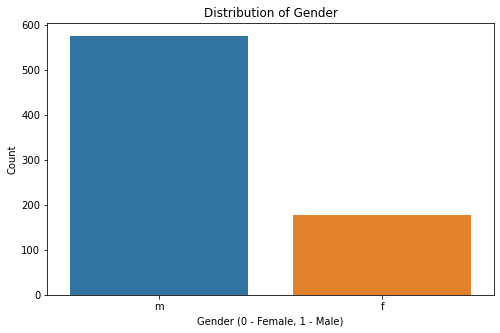

In [20]:
# Visualize the distribution of gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 - Female, 1 - Male)')
plt.ylabel('Count')
plt.show();

- The gender distribution visualization reveals a noticeable imbalance, with a considerably higher number of male writers compared to female writers.
- To improve the results, it might be necessary to apply normalization techniques.

In [21]:
# Encode gender labels
label_encoder = LabelEncoder()
df_train['gender'] = label_encoder.fit_transform(df_train['gender'])

In [22]:
# Split the data for cross-validation
X = df_train['story']
y = df_train['gender']

In [23]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [24]:
# Define models and their respective parameter grids
models = {
    'RandomForest': (RandomForestClassifier(), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),
    'SVM': (SVC(probability=True), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto', 0.1, 0.01]
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 5],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'KNeighbors': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2]
    }),
    'MultinomialNB': (MultinomialNB(), {
        'classifier__alpha': [0.1, 0.5, 1.0]
    })
}

In [25]:
# Create variables to keep track of the best-performing model and hyperparameters
best_model_name = None
best_params = None
best_score = -1  

# Iterate through models and perform hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    # Create a pipeline with the model
    pipeline = Pipeline([
        ('tfidf_vectorizer', tfidf_vectorizer),
        ('classifier', model)
    ])

    # Create GridSearchCV to perform hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, scoring=custom_scorer, cv=5, n_jobs=-1, verbose=2)

    # Print the model being trained and the chosen hyperparameters
    print(f"Training {model_name} model...")
    print(f"Hyperparameter grid for {model_name}: {param_grid}")

    # Perform hyperparameter tuning
    grid_search.fit(X, y)

    # Get the best hyperparameters and their corresponding score
    best_params_candidate = grid_search.best_params_
    best_score_candidate = grid_search.best_score_

    print(f"Best Hyperparameters for {model_name}: {best_params_candidate}")
    print(f"Best Cross-Validated Average F1 Score for {model_name}: {best_score_candidate:.4f}")

    # Check if this model performed better than the current best
    if best_score_candidate > best_score:
        best_model_name = model_name
        best_params = best_params_candidate
        best_score = best_score_candidate

    # Train the final classifier with the best hyperparameters
    best_classifier = grid_search.best_estimator_

    # Vectorize test data
    X_test_tfidf = tfidf_vectorizer.transform(df_test['story'])

    # Make predictions on test data
    test_predictions = best_classifier.named_steps['classifier'].predict(X_test_tfidf)

    # Inverse transform label encoding for submission
    test_predictions = label_encoder.inverse_transform(test_predictions)

    # Save predictions to a CSV file with a timestamp
    log_filename = f'text_analysis_{model_name}_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.log'
    file_handler = logging.FileHandler(log_filename)
    file_handler.setLevel(logging.INFO)
    file_handler.setFormatter(formatter)
    logger.addHandler(file_handler)

    # Save predictions to a CSV file
    submission = pd.DataFrame({'test_example_id': df_test['test_example_id'], 'gender': test_predictions})
    submission.to_csv(f'submission_{model_name}.csv', index=False)

# Print the best-performing model and its score
print(f"Best Model: {best_model_name}")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validated Average F1 Score: {best_score:.4f}")

Training RandomForest model...
Hyperparameter grid for RandomForest: {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Cross-Validated Average F1 Score for RandomForest: 0.5179
Training SVM model...
Hyperparameter grid for SVM: {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf'], 'classifier__gamma': ['scale', 'auto', 0.1, 0.01]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for SVM: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Cross-Validated Average F1 Score for SVM: 0.6736
Training GradientBoosting model...
Hyperparameter grid for GradientBoosting: {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [3, 4, 5], 'classifier__min_samples_split': [2, 5, 10]}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for GradientBoosting: {'classifier__max_depth': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best Cross-Validated Average F1 Score for GradientBoosting: 0.6196
Training KNeighbors model...
Hyperparameter grid for KNeighbors: {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance'], 'classifier__p': [1, 2]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [3, 5, 7],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for KNeighbors: {'classifier__n_neighbors': 3, 'classifier__p': 2, 'classifier__weights': 'uniform'}
Best Cross-Validated Average F1 Score for KNeighbors: 0.6148
Training MultinomialNB model...
Hyperparameter grid for MultinomialNB: {'classifier__alpha': [0.1, 0.5, 1.0]}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1, param_grid={'classifier__alpha': [0.1, 0.5, 1.0]},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for MultinomialNB: {'classifier__alpha': 0.1}
Best Cross-Validated Average F1 Score for MultinomialNB: 0.5065
Best Model: SVM
Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Cross-Validated Average F1 Score: 0.6736


After an extensive hyperparameter search to train various models, including RandomForest, SVM, GradientBoosting, KNeighbors, and MultinomialNB, the model that performed the best with the optimal set of hyperparameters is as follows:

**Best Model:** Support Vector Machine (SVM)

**Best Hyperparameters:** 
- C: 10
- Gamma: 'scale'
- Kernel: 'linear'

**Best Cross-Validated Average F1 Score:** 0.6736

In an effort to further improve results, the next step is to explore ensemble voting algorithms. 

Ensemble voting is a technique that combines predictions from multiple machine learning models to make more accurate predictions. It works by allowing each model to "vote" on the predicted outcome, and the final prediction is often determined by a majority vote (hard voting) or a weighted average of the model's predictions (soft voting). This ensemble approach can help enhance the overall performance and robustness of the predictive model.

The goal of using ensemble voting is to leverage the diversity of different models and their strengths to achieve better predictive accuracy and generalization.


## Experimenting with Ensemble Voting

In [26]:
# Define kernels and their respective parameter grids
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Initialize variables to store the best model and hyperparameters
best_model = None
best_params = {}
best_score = 0

# Initialize a dictionary to store the results of each model
model_results = {}

In [27]:
for model_name, (model, param_grid) in models.items():
    if model_name == 'SVM':
        kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    else:
        kernels = [None]  
    
    for kernel in kernels:
        # Create a pipeline with the model
        pipeline = Pipeline([
            ('tfidf_vectorizer', tfidf_vectorizer),
            ('classifier', model)
        ])
        
        if kernel:
            param_grid['classifier__kernel'] = [kernel]

        # Create GridSearchCV to perform hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid, scoring=custom_scorer, cv=5, n_jobs=-1, verbose=2)

        # Print the model being trained and the chosen hyperparameters
        print(f"Training {model_name} model with kernel: {kernel}...")
        print(f"Hyperparameter grid for {model_name}: {param_grid}")

        # Perform hyperparameter tuning
        grid_search.fit(X, y)

        # Get the best hyperparameters and their corresponding score
        best_params_candidate = grid_search.best_params_
        best_score_candidate = grid_search.best_score_

        print(f"Best Hyperparameters for {model_name} with kernel: {kernel}: {best_params_candidate}")
        print(f"Best Cross-Validated Average F1 Score for {model_name} with kernel: {kernel}: {best_score_candidate:.4f}")

        # Implement ensemble voting
        if best_score_candidate > best_score:
            best_model_name = model_name
            best_score = best_score_candidate
            best_params = best_params_candidate
            best_classifier = grid_search.best_estimator_

        # Store the results in the model_results dictionary
        model_results[f"{model_name}_{kernel}"] = {
            'best_params': best_params_candidate,
            'best_score': best_score_candidate,
            'best_classifier': grid_search.best_estimator_
        }
            
# Find and print the best-performing model and its score
print(f"Best Model: {best_model_name}")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validated Average F1 Score: {best_score:.4f}")

Training RandomForest model with kernel: None...
Hyperparameter grid for RandomForest: {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for RandomForest with kernel: None: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Cross-Validated Average F1 Score for RandomForest with kernel: None: 0.5313
Training SVM model with kernel: linear...
Hyperparameter grid for SVM: {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear'], 'classifier__gamma': ['scale', 'auto', 0.1, 0.01]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
                         'classifier__kernel': ['linear']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for SVM with kernel: linear: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Cross-Validated Average F1 Score for SVM with kernel: linear: 0.6736
Training SVM model with kernel: rbf...
Hyperparameter grid for SVM: {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['rbf'], 'classifier__gamma': ['scale', 'auto', 0.1, 0.01]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
                         'classifier__kernel': ['rbf']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for SVM with kernel: rbf: {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best Cross-Validated Average F1 Score for SVM with kernel: rbf: 0.6534
Training SVM model with kernel: poly...
Hyperparameter grid for SVM: {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['poly'], 'classifier__gamma': ['scale', 'auto', 0.1, 0.01]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
                         'classifier__kernel': ['poly']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for SVM with kernel: poly: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}
Best Cross-Validated Average F1 Score for SVM with kernel: poly: 0.4658
Training SVM model with kernel: sigmoid...
Hyperparameter grid for SVM: {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['sigmoid'], 'classifier__gamma': ['scale', 'auto', 0.1, 0.01]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
                         'classifier__kernel': ['sigmoid']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for SVM with kernel: sigmoid: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}
Best Cross-Validated Average F1 Score for SVM with kernel: sigmoid: 0.6950
Training GradientBoosting model with kernel: None...
Hyperparameter grid for GradientBoosting: {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [3, 4, 5], 'classifier__min_samples_split': [2, 5, 10]}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for GradientBoosting with kernel: None: {'classifier__max_depth': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best Cross-Validated Average F1 Score for GradientBoosting with kernel: None: 0.6139
Training KNeighbors model with kernel: None...
Hyperparameter grid for KNeighbors: {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance'], 'classifier__p': [1, 2]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [3, 5, 7],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for KNeighbors with kernel: None: {'classifier__n_neighbors': 3, 'classifier__p': 2, 'classifier__weights': 'uniform'}
Best Cross-Validated Average F1 Score for KNeighbors with kernel: None: 0.6148
Training MultinomialNB model with kernel: None...
Hyperparameter grid for MultinomialNB: {'classifier__alpha': [0.1, 0.5, 1.0]}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1, param_grid={'classifier__alpha': [0.1, 0.5, 1.0]},
             scoring=make_scorer(average_f1), verbose=2)

Best Hyperparameters for MultinomialNB with kernel: None: {'classifier__alpha': 0.1}
Best Cross-Validated Average F1 Score for MultinomialNB with kernel: None: 0.5065
Best Model: SVM
Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}
Best Cross-Validated Average F1 Score: 0.6950


After conducting extensive testing with ensemble voting and exploring various hyperparameter settings, the standout performer among the candidates is as follows:

**Best Model:** Support Vector Machine (SVM)

**Best Hyperparameters:** 
- C: 10
- Gamma: 'scale'
- Kernel: 'sigmoid'

**Best Cross-Validated Average F1 Score:** 0.6950

Moving forward, the primary focus will be on further fine-tuning this SVM model with the aim of achieving an even higher performance score.


## Further Fine-tuning the SVM Model

In [28]:
# Define file paths
TRAIN_FILENAME = 'annotated_corpus_for_train.csv'
TEST_FILENAME = 'corpus_for_test.csv'

# Initialize logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

# Load training data
train_data = pd.read_csv(TRAIN_FILENAME)

# Load test data
test_data = pd.read_csv(TEST_FILENAME)

# Extract features and labels
X = train_data['story']
y = train_data['gender']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Vectorize train and validation data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

# Define a custom scorer for F1 score
custom_scorer = make_scorer(f1_score, pos_label=None, average='weighted')

# Define SVM classifier with kernel parameter
svm_classifier = SVC(probability=True)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0, 100.0],  
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__max_iter': [1000, 2000],
    'classifier__degree': [2, 3, 4],  
    'classifier__coef0': [0.0, 0.1, 1.0],  
}

# Create a pipeline with SVM classifier
pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', SVC(probability=True))
])

# Create GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring=custom_scorer, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and their corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final classifier with the best hyperparameters
best_classifier = grid_search.best_estimator_

# Updated pipeline with the best SVM classifier
updated_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', SVC(probability=True, C=best_params['classifier__C'], kernel=best_params['classifier__kernel'],
                       max_iter=best_params['classifier__max_iter'],
                       degree=best_params.get('classifier__degree', 3),  
                       coef0=best_params.get('classifier__coef0', 0.0)))  
])

# Vectorize test data
X_test_tfidf = tfidf_vectorizer.transform(test_data['story'])

# Make predictions on the test data
test_predictions = best_classifier.named_steps['classifier'].predict(X_test_tfidf)

# Inverse transform label encoding for submission
test_predictions = label_encoder.inverse_transform(test_predictions)

# Save predictions to a CSV file with a timestamp
log_filename = f'text_analysis_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.log'
file_handler = logging.FileHandler(log_filename)
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# Save predictions to a CSV file
submission = pd.DataFrame({'test_example_id': test_data['test_example_id'], 'gender': test_predictions})
submission.to_csv(f'submission_svm.csv', index=False)

# Print the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validated Average F1 Score: {best_score:.4f}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1.0, 10.0, 100.0],
                         'classifier__coef0': [0.0, 0.1, 1.0],
                         'classifier__degree': [2, 3, 4],
                         'classifier__kernel': ['linear', 'rbf', 'poly',
                                                'sigmoid'],
                         'classifier__max_iter': [1000, 2000]},
             scoring=make_scorer(f1_score, pos_label=None, average=weighted),
             verbose=2)

Best Hyperparameters: {'classifier__C': 10.0, 'classifier__coef0': 0.0, 'classifier__degree': 2, 'classifier__kernel': 'sigmoid', 'classifier__max_iter': 1000}
Best Cross-Validated Average F1 Score: 0.7703


## Conclusion

After an extensive experiment focused on fine-tuning the Support Vector Machine (SVM) model, several changes were made to the approach to enhance its performance:

1. **Hyperparameter Expansion:** The hyperparameter search space was expanded by increasing the range of values for key hyperparameters:
   - The 'C' parameter was explored with values of 0.1, 1.0, 10.0, and 100.0.
   - The 'kernel' parameter was tested with 'linear', 'rbf', 'poly', and 'sigmoid'.
   - The 'max_iter' parameter was evaluated with values of 1000 and 2000.
   - For the 'poly' kernel, the 'degree' hyperparameter was varied between 2, 3, and 4.
   - The 'coef0' hyperparameter was adjusted with values of 0.0, 0.1, and 1.0 for the 'poly' and 'sigmoid' kernels.

These changes in hyperparameter search allowed for a more thorough exploration of the SVM model's configuration space.

The outcome of this refined approach yielded the following best-performing model:

**Best Hyperparameters:** 
- C: 10.0
- Coef0: 0.0
- Degree: 2
- Kernel: 'sigmoid'
- Max Iterations: 1000

**Best Cross-Validated Average F1 Score:** 0.7703

As a result of this experiment, it was observed that the optimized SVM model achieved a higher F1 score compared to the previous version. The tuning process focused on identifying hyperparameters that led to improved model performance and generalization.


-------------------------

-------------------------

-------------------------

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [30]:
submission.to_csv('classification_results.csv',index=False)

In [31]:
gender_counts = submission['gender'].value_counts()
print("\n")
print("Gender Value Counts:")
print("\n")
print(gender_counts)
print("\n")

print(submission)
submission.shape
print("\n")



Gender Value Counts:


gender
m    261
f     62
Name: count, dtype: int64


     test_example_id gender
0                  0      m
1                  1      m
2                  2      m
3                  3      m
4                  4      f
..               ...    ...
318              318      m
319              319      m
320              320      m
321              321      m
322              322      m

[323 rows x 2 columns]


(323, 2)

-------------------------

-------------------------

# Out of scope experiments

## Experiment with Topic Modeling Visualization

In [32]:
#!pip install pyLDAvis

In [33]:
from gensim import corpora, models
import gensim

# Tokenize and preprocess 
tokens = [preprocess_text(text).split() for text in df_train['story']]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

# Train an LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

2023-09-03 18:20:09,948 - INFO - adding document #0 to Dictionary<0 unique tokens: []>
2023-09-03 18:20:10,197 - INFO - built Dictionary<34957 unique tokens: ['אבל', 'אגם', 'אומנם', 'אומר', 'אוקיי']...> from 753 documents (total 250185 corpus positions)
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 73-75: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 109-111: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.p

2023-09-03 18:20:10,399 - INFO - using symmetric alpha at 0.2
2023-09-03 18:20:10,400 - INFO - using symmetric eta at 0.2
2023-09-03 18:20:10,405 - INFO - using serial LDA version on this node
2023-09-03 18:20:10,421 - INFO - running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 753 documents, updating model once every 753 documents, evaluating perplexity every 753 documents, iterating 50x with a convergence threshold of 0.001000
2023-09-03 18:20:11,461 - INFO - -11.442 per-word bound, 2781.6 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:11,462 - INFO - PROGRESS: pass 0, at document #753/753
2023-09-03 18:20:12,021 - INFO - topic #0 (0.200): 0.021*"את" + 0.014*"לא" + 0.011*"היה" + 0.010*"של" + 0.008*"עם" + 0.008*"כל" + 0.008*"שלי" + 0.007*"לי" + 0.006*"אני" + 0.006*"על"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:13,116 - INFO - -8.985 per-word bound, 506.7 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:13,117 - INFO - PROGRESS: pass 1, at document #753/753
2023-09-03 18:20:13,672 - INFO - topic #0 (0.200): 0.020*"את" + 0.015*"לא" + 0.010*"היה" + 0.010*"של" + 0.009*"שלי" + 0.008*"עם" + 0.008*"כל" + 0.008*"לי" + 0.007*"על" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:14,739 - INFO - -8.832 per-word bound, 455.7 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:14,740 - INFO - PROGRESS: pass 2, at document #753/753
2023-09-03 18:20:15,189 - INFO - topic #0 (0.200): 0.020*"את" + 0.015*"לא" + 0.010*"היה" + 0.010*"של" + 0.009*"שלי" + 0.008*"לי" + 0.008*"עם" + 0.008*"כל" + 0.007*"על" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:16,171 - INFO - -8.771 per-word bound, 436.7 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:16,172 - INFO - PROGRESS: pass 3, at document #753/753
2023-09-03 18:20:16,589 - INFO - topic #0 (0.200): 0.020*"את" + 0.015*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.008*"לי" + 0.008*"עם" + 0.008*"כל" + 0.008*"על" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:17,572 - INFO - -8.745 per-word bound, 429.0 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:17,573 - INFO - PROGRESS: pass 4, at document #753/753
2023-09-03 18:20:17,996 - INFO - topic #0 (0.200): 0.019*"את" + 0.015*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.008*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:18,973 - INFO - -8.732 per-word bound, 425.3 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:18,974 - INFO - PROGRESS: pass 5, at document #753/753
2023-09-03 18:20:19,390 - INFO - topic #0 (0.200): 0.019*"את" + 0.015*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.008*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:20,365 - INFO - -8.725 per-word bound, 423.3 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:20,366 - INFO - PROGRESS: pass 6, at document #753/753
2023-09-03 18:20:20,783 - INFO - topic #0 (0.200): 0.019*"את" + 0.015*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.008*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:21,770 - INFO - -8.721 per-word bound, 422.0 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:21,771 - INFO - PROGRESS: pass 7, at document #753/753
2023-09-03 18:20:22,190 - INFO - topic #0 (0.200): 0.019*"את" + 0.015*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.008*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:23,178 - INFO - -8.718 per-word bound, 421.2 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:23,180 - INFO - PROGRESS: pass 8, at document #753/753
2023-09-03 18:20:23,608 - INFO - topic #0 (0.200): 0.019*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:24,671 - INFO - -8.716 per-word bound, 420.5 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:24,672 - INFO - PROGRESS: pass 9, at document #753/753
2023-09-03 18:20:25,098 - INFO - topic #0 (0.200): 0.019*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacond

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:26,068 - INFO - -8.714 per-word bound, 420.0 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:26,069 - INFO - PROGRESS: pass 10, at document #753/753
2023-09-03 18:20:26,492 - INFO - topic #0 (0.200): 0.020*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacon

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:27,451 - INFO - -8.713 per-word bound, 419.5 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:27,452 - INFO - PROGRESS: pass 11, at document #753/753
2023-09-03 18:20:27,865 - INFO - topic #0 (0.200): 0.020*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacon

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:28,846 - INFO - -8.711 per-word bound, 419.1 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:28,847 - INFO - PROGRESS: pass 12, at document #753/753
2023-09-03 18:20:29,258 - INFO - topic #0 (0.200): 0.020*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacon

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:30,240 - INFO - -8.710 per-word bound, 418.8 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:30,241 - INFO - PROGRESS: pass 13, at document #753/753
2023-09-03 18:20:30,660 - INFO - topic #0 (0.200): 0.020*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacon

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:31,642 - INFO - -8.709 per-word bound, 418.4 perplexity estimate based on a held-out corpus of 753 documents with 250185 words
2023-09-03 18:20:31,643 - INFO - PROGRESS: pass 14, at document #753/753
2023-09-03 18:20:32,054 - INFO - topic #0 (0.200): 0.020*"את" + 0.016*"לא" + 0.010*"של" + 0.010*"היה" + 0.009*"שלי" + 0.009*"לי" + 0.008*"על" + 0.008*"עם" + 0.008*"כל" + 0.007*"אני"
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anacon

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alex9\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\alex9\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-59: character maps to <undefined>
Call stack:
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alex9\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\alex9\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alex9\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

2023-09-03 18:20:32,159 - INFO - LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=34957, num_topics=5, decay=0.5, chunksize=2000> in 21.74s', 'datetime': '2023-09-03T18:20:32.159128', 'gensim': '4.3.2', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}


In [34]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary, n_jobs=1)
pyLDAvis.display(vis_data)


## Experiment with Sequential Neural Network

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import logging
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint

# Define file paths
TRAIN_FILENAME = 'annotated_corpus_for_train.csv'
TEST_FILENAME = 'corpus_for_test.csv'

# Initialize logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

# Load training data
train_data = pd.read_csv(TRAIN_FILENAME)

# Load test data
test_data = pd.read_csv(TEST_FILENAME)

# Extract features and labels
X = train_data['story']
y = train_data['gender']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad text data
max_sequence_length = 100  # Adjust this based on your data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
X_test_seq = tokenizer.texts_to_sequences(test_data['story'])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_valid_pad = pad_sequences(X_valid_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Define hyperparameters to iterate over
learning_rates = [0.001, 0.01, 0.1]
num_epochs = [10, 15, 20]
batch_sizes = [32, 64, 128]

best_f1_score = 0.0
best_hyperparameters = {}

# Iterate through hyperparameter settings
for lr in learning_rates:
    for epochs in num_epochs:
        for batch_size in batch_sizes:
            # Define the neural network model
            model = Sequential()
            model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
            model.add(Bidirectional(LSTM(64, return_sequences=True)))
            model.add(Dense(32, activation='relu'))
            model.add(Dropout(0.5))
            model.add(GlobalMaxPooling1D())  
            model.add(Dense(1, activation='sigmoid'))
            
            # Create learning rate scheduler callback
            def lr_schedule(epoch):
                return lr
            
            lr_scheduler = LearningRateScheduler(lr_schedule)
            
            # Compile the model with binary_crossentropy loss and current hyperparameters
            model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

            # Ensure labels are in binary format
            y_train_binary = (y_train >= 4).astype(int)
            y_valid_binary = (y_valid >= 4).astype(int)

            # Pad sequences
            X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
            X_valid_pad = pad_sequences(X_valid_seq, maxlen=max_sequence_length)

            # Early stopping callback
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model with binary labels and learning rate scheduling
            model.fit(
                X_train_pad,
                y_train_binary,
                validation_data=(X_valid_pad, y_valid_binary),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=[lr_scheduler, early_stopping]
            )

            # Evaluate the model on the validation set
            y_valid_pred = (model.predict(X_valid_pad) > 0.5).astype(int)
            f1_score_valid = f1_score(y_valid, y_valid_pred, average='weighted')

            # Check if this set of hyperparameters achieved a better F1 score
            if f1_score_valid > best_f1_score:
                best_f1_score = f1_score_valid
                best_hyperparameters = {
                    'Learning Rate': lr,
                    'Epochs': epochs,
                    'Batch Size': batch_size
                }

# Print the best hyperparameters and F1 score
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Validation F1 Score: {best_f1_score:.4f}")

# Make predictions on the test data using the best model
# Define the model with the best hyperparameters and train it again on the full training data
best_model = Sequential()
best_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
best_model.add(Bidirectional(LSTM(64, return_sequences=True)))
best_model.add(Dense(32, activation='relu'))
best_model.add(Dropout(0.5))
best_model.add(GlobalMaxPooling1D())  # Replace Flatten() with GlobalMaxPooling1D()
best_model.add(Dense(1, activation='sigmoid'))
best_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=best_hyperparameters['Learning Rate']), metrics=['accuracy'])
best_model.fit(X_train_pad, y_train_binary, epochs=best_hyperparameters['Epochs'], batch_size=best_hyperparameters['Batch Size'])
y_test_pred = (best_model.predict(X_test_pad) > 0.5).astype(int)

# Inverse transform label encoding for submission
test_predictions = label_encoder.inverse_transform(y_test_pred)

# Save predictions to a CSV file with a timestamp
log_filename = f'text_analysis_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.log'
file_handler = logging.FileHandler(log_filename)
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# Save predictions to a CSV file
submission = pd.DataFrame({'test_example_id': test_data['test_example_id'], 'gender': test_predictions})
submission.to_csv(f'submission_nn.csv', index=False)


Epoch 1/10
19/19 [==============================] - 5s 116ms/step - loss: 0.3062 - accuracy: 1.0000 - val_loss: 1.5290e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 1s 79ms/step - loss: 1.8138e-09 - accuracy: 1.0000 - val_loss: 7.1136e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 2s 80ms/step - loss: 2.3869e-13 - accuracy: 1.0000 - val_loss: 3.3411e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 2s 81ms/step - loss: 1.0328e-13 - accuracy: 1.0000 - val_loss: 2.9597e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
19/19 [==============================] - 2s 85ms/step - loss: 9.1773e-14 - accuracy: 1.0000 - val_loss: 2.9048e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
19/19 [==============================] - 2s 86ms/step - loss: 9.0126e-14 - accuracy: 1.0000 - val_loss: 2.8967e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
19/19 [=============

5/5 [==============================] - 1s 22ms/step
Epoch 1/10
10/10 [==============================] - 5s 197ms/step - loss: 0.5525 - accuracy: 0.9485 - val_loss: 0.4591 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 1s 134ms/step - loss: 0.0847 - accuracy: 1.0000 - val_loss: 5.6975e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 1s 136ms/step - loss: 7.1953e-08 - accuracy: 1.0000 - val_loss: 5.2858e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 1s 135ms/step - loss: 1.4516e-09 - accuracy: 1.0000 - val_loss: 2.3312e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 1s 139ms/step - loss: 4.2427e-10 - accuracy: 1.0000 - val_loss: 1.6995e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
10/10 [==============================] - 1s 127ms/step - loss: 2.6997e-10 - accuracy: 1.0000 - val_loss: 1.5051e-05 - val_accuracy: 1.

5/5 [==============================] - 1s 22ms/step
Epoch 1/10
5/5 [==============================] - 5s 367ms/step - loss: 0.5692 - accuracy: 1.0000 - val_loss: 0.5495 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 1s 216ms/step - loss: 0.3457 - accuracy: 1.0000 - val_loss: 0.3481 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 1s 214ms/step - loss: 0.0689 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 1s 213ms/step - loss: 1.4054e-05 - accuracy: 1.0000 - val_loss: 4.2130e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 1s 218ms/step - loss: 6.5472e-10 - accuracy: 1.0000 - val_loss: 5.8438e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 1s 240ms/step - loss: 1.8131e-11 - accuracy: 1.0000 - val_loss: 1.9731e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 

5/5 [==============================] - 1s 22ms/step
Epoch 1/15
19/19 [==============================] - 5s 115ms/step - loss: 0.2536 - accuracy: 1.0000 - val_loss: 5.3947e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/15
19/19 [==============================] - 2s 80ms/step - loss: 2.0070e-12 - accuracy: 1.0000 - val_loss: 7.0982e-09 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/15
19/19 [==============================] - 2s 84ms/step - loss: 2.1164e-17 - accuracy: 1.0000 - val_loss: 2.8684e-09 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
19/19 [==============================] - 2s 95ms/step - loss: 7.5795e-18 - accuracy: 1.0000 - val_loss: 2.4836e-09 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
19/19 [==============================] - 2s 81ms/step - loss: 6.5683e-18 - accuracy: 1.0000 - val_loss: 2.4290e-09 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/15
19/19 [==============================] - 1s 79ms/step - loss: 6.4425e-18 - accuracy: 1.0000 - val_loss: 2.4209e-09 - val_accuracy:

5/5 [==============================] - 1s 21ms/step
Epoch 1/15
10/10 [==============================] - 5s 193ms/step - loss: 0.5235 - accuracy: 0.9219 - val_loss: 0.3939 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/15
10/10 [==============================] - 1s 110ms/step - loss: 0.0464 - accuracy: 1.0000 - val_loss: 2.8513e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/15
10/10 [==============================] - 1s 113ms/step - loss: 1.5616e-10 - accuracy: 1.0000 - val_loss: 1.5257e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
10/10 [==============================] - 1s 119ms/step - loss: 1.0516e-12 - accuracy: 1.0000 - val_loss: 5.5794e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
10/10 [==============================] - 1s 122ms/step - loss: 2.2965e-13 - accuracy: 1.0000 - val_loss: 3.8060e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/15
10/10 [==============================] - 1s 128ms/step - loss: 1.3287e-13 - accuracy: 1.0000 - val_loss: 3.2888e-07 - val_accuracy: 1.

5/5 [==============================] - 1s 22ms/step
Epoch 1/15
5/5 [==============================] - 5s 497ms/step - loss: 0.6232 - accuracy: 0.9734 - val_loss: 0.5914 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 1s 235ms/step - loss: 0.4194 - accuracy: 1.0000 - val_loss: 0.4109 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 1s 246ms/step - loss: 0.1077 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 1s 236ms/step - loss: 5.2031e-05 - accuracy: 1.0000 - val_loss: 2.2681e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 1s 255ms/step - loss: 2.1052e-08 - accuracy: 1.0000 - val_loss: 4.5658e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - 1s 261ms/step - loss: 1.1899e-09 - accuracy: 1.0000 - val_loss: 1.8624e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 

5/5 [==============================] - 1s 23ms/step
Epoch 1/20
19/19 [==============================] - 5s 117ms/step - loss: 0.3184 - accuracy: 0.9934 - val_loss: 3.5052e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/20
19/19 [==============================] - 2s 81ms/step - loss: 9.9599e-09 - accuracy: 1.0000 - val_loss: 3.0699e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
19/19 [==============================] - 2s 85ms/step - loss: 4.8128e-12 - accuracy: 1.0000 - val_loss: 1.5926e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
19/19 [==============================] - 2s 88ms/step - loss: 2.3621e-12 - accuracy: 1.0000 - val_loss: 1.4344e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
19/19 [==============================] - 2s 94ms/step - loss: 2.1334e-12 - accuracy: 1.0000 - val_loss: 1.4114e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
19/19 [==============================] - 2s 85ms/step - loss: 2.0997e-12 - accuracy: 1.0000 - val_loss: 1.4080e-06 - val_accuracy:

5/5 [==============================] - 1s 22ms/step
Epoch 1/20
10/10 [==============================] - 5s 185ms/step - loss: 0.5380 - accuracy: 0.9867 - val_loss: 0.4391 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 1s 114ms/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 3.8235e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 1s 114ms/step - loss: 2.6450e-08 - accuracy: 1.0000 - val_loss: 1.5523e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 1s 115ms/step - loss: 1.0910e-10 - accuracy: 1.0000 - val_loss: 5.5962e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 1s 117ms/step - loss: 2.3314e-11 - accuracy: 1.0000 - val_loss: 3.8244e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 1s 120ms/step - loss: 1.3488e-11 - accuracy: 1.0000 - val_loss: 3.3085e-06 - val_accuracy: 1.

5/5 [==============================] - 1s 50ms/step
Epoch 1/20
5/5 [==============================] - 8s 1s/step - loss: 0.6670 - accuracy: 0.6296 - val_loss: 0.6161 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 4s 877ms/step - loss: 0.4839 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 4s 914ms/step - loss: 0.2488 - accuracy: 1.0000 - val_loss: 0.1989 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 4s 894ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - 4s 881ms/step - loss: 7.5395e-07 - accuracy: 1.0000 - val_loss: 1.5478e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - 4s 897ms/step - loss: 1.2276e-08 - accuracy: 1.0000 - val_loss: 5.2694e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/20
5/5 [=

5/5 [==============================] - 1s 67ms/step
Epoch 1/10
19/19 [==============================] - 10s 359ms/step - loss: 0.0696 - accuracy: 0.9967 - val_loss: 2.8173e-16 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/10
19/19 [==============================] - 6s 320ms/step - loss: 6.7214e-33 - accuracy: 1.0000 - val_loss: 2.5548e-19 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/10
19/19 [==============================] - 6s 313ms/step - loss: 2.0122e-38 - accuracy: 1.0000 - val_loss: 7.7811e-20 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/10
19/19 [==============================] - 5s 288ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.4264e-20 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/10
19/19 [==============================] - 6s 293ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.2393e-20 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/10
19/19 [==============================] - 6s 314ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.2117e-20 - val_acc

5/5 [==============================] - 2s 61ms/step
Epoch 1/10
10/10 [==============================] - 8s 448ms/step - loss: 0.1383 - accuracy: 0.9236 - val_loss: 1.9996e-12 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/10
10/10 [==============================] - 4s 363ms/step - loss: 4.9782e-25 - accuracy: 1.0000 - val_loss: 7.3695e-18 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/10
10/10 [==============================] - 3s 351ms/step - loss: 8.7184e-36 - accuracy: 1.0000 - val_loss: 5.0665e-20 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/10
10/10 [==============================] - 4s 353ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.0007e-21 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/10
10/10 [==============================] - 4s 363ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.2262e-21 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/10
10/10 [==============================] - 4s 356ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3941e-21 - val_accu

5/5 [==============================] - 1s 62ms/step
Epoch 1/10
5/5 [==============================] - 8s 990ms/step - loss: 0.2377 - accuracy: 0.9917 - val_loss: 1.4231e-08 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/10
5/5 [==============================] - 4s 838ms/step - loss: 4.7204e-17 - accuracy: 1.0000 - val_loss: 1.4955e-14 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/10
5/5 [==============================] - 4s 826ms/step - loss: 5.5704e-29 - accuracy: 1.0000 - val_loss: 3.2540e-18 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/10
5/5 [==============================] - 4s 826ms/step - loss: 2.8206e-36 - accuracy: 1.0000 - val_loss: 1.8110e-20 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/10
5/5 [==============================] - 4s 838ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.0385e-22 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/10
5/5 [==============================] - 4s 834ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.1558e-23 - val_accuracy: 1.0000

5/5 [==============================] - 1s 70ms/step
Epoch 1/15
19/19 [==============================] - 10s 378ms/step - loss: 0.0691 - accuracy: 0.9468 - val_loss: 4.2626e-14 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/15
19/19 [==============================] - 6s 339ms/step - loss: 1.6352e-28 - accuracy: 1.0000 - val_loss: 1.0205e-16 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/15
19/19 [==============================] - 6s 342ms/step - loss: 4.3210e-33 - accuracy: 1.0000 - val_loss: 3.6597e-17 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/15
19/19 [==============================] - 6s 341ms/step - loss: 1.3204e-33 - accuracy: 1.0000 - val_loss: 3.1028e-17 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/15
19/19 [==============================] - 6s 339ms/step - loss: 1.1202e-33 - accuracy: 1.0000 - val_loss: 3.0246e-17 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/15
19/19 [==============================] - 6s 327ms/step - loss: 1.0900e-33 - accuracy: 1.0000 - val_loss: 3.0130e-17 - val_acc

5/5 [==============================] - 1s 70ms/step
Epoch 1/15
10/10 [==============================] - 8s 450ms/step - loss: 0.1396 - accuracy: 0.9203 - val_loss: 9.2806e-11 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/15
10/10 [==============================] - 4s 398ms/step - loss: 1.0077e-21 - accuracy: 1.0000 - val_loss: 8.6793e-16 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/15
10/10 [==============================] - 4s 401ms/step - loss: 1.1241e-31 - accuracy: 1.0000 - val_loss: 8.2299e-18 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/15
10/10 [==============================] - 4s 416ms/step - loss: 1.9750e-35 - accuracy: 1.0000 - val_loss: 1.2844e-18 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/15
10/10 [==============================] - 4s 388ms/step - loss: 9.3106e-37 - accuracy: 1.0000 - val_loss: 6.2034e-19 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/15
10/10 [==============================] - 4s 380ms/step - loss: 3.1626e-37 - accuracy: 1.0000 - val_loss: 4.6871e-19 - val_accu

5/5 [==============================] - 1s 78ms/step
Epoch 1/15
5/5 [==============================] - 9s 1s/step - loss: 0.2482 - accuracy: 0.9269 - val_loss: 1.3146e-07 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/15
5/5 [==============================] - 4s 871ms/step - loss: 4.1005e-15 - accuracy: 1.0000 - val_loss: 4.7643e-13 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/15
5/5 [==============================] - 5s 934ms/step - loss: 5.7466e-26 - accuracy: 1.0000 - val_loss: 1.5796e-16 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/15
5/5 [==============================] - 5s 948ms/step - loss: 6.7844e-33 - accuracy: 1.0000 - val_loss: 1.0692e-18 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/15
5/5 [==============================] - 5s 936ms/step - loss: 3.6246e-37 - accuracy: 1.0000 - val_loss: 4.6268e-20 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/15
5/5 [==============================] - 5s 963ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.3846e-21 - val_accuracy: 1.0000 - 

5/5 [==============================] - 1s 72ms/step
Epoch 1/20
19/19 [==============================] - 10s 376ms/step - loss: 0.0884 - accuracy: 0.9468 - val_loss: 3.5268e-12 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
19/19 [==============================] - 6s 336ms/step - loss: 1.2120e-24 - accuracy: 1.0000 - val_loss: 2.0045e-14 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/20
19/19 [==============================] - 6s 317ms/step - loss: 1.8774e-28 - accuracy: 1.0000 - val_loss: 8.3016e-15 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/20
19/19 [==============================] - 6s 303ms/step - loss: 6.9017e-29 - accuracy: 1.0000 - val_loss: 7.2028e-15 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/20
19/19 [==============================] - 6s 301ms/step - loss: 6.0095e-29 - accuracy: 1.0000 - val_loss: 7.0465e-15 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/20
19/19 [==============================] - 6s 315ms/step - loss: 5.8858e-29 - accuracy: 1.0000 - val_loss: 7.0232e-15 - val_acc

5/5 [==============================] - 2s 75ms/step
Epoch 1/20
10/10 [==============================] - 8s 457ms/step - loss: 0.1163 - accuracy: 0.9967 - val_loss: 1.0823e-13 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
10/10 [==============================] - 4s 413ms/step - loss: 1.4531e-27 - accuracy: 1.0000 - val_loss: 3.3794e-19 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/20
10/10 [==============================] - 4s 414ms/step - loss: 1.7117e-38 - accuracy: 1.0000 - val_loss: 2.5128e-21 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/20
10/10 [==============================] - 4s 428ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.6075e-22 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/20
10/10 [==============================] - 4s 403ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6883e-22 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/20
10/10 [==============================] - 4s 390ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2604e-22 - val_accu

5/5 [==============================] - 1s 73ms/step
Epoch 1/20
5/5 [==============================] - 8s 1s/step - loss: 0.2576 - accuracy: 0.7874 - val_loss: 3.7952e-07 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
5/5 [==============================] - 5s 913ms/step - loss: 3.3513e-14 - accuracy: 1.0000 - val_loss: 6.5582e-12 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/20
5/5 [==============================] - 4s 826ms/step - loss: 1.0720e-23 - accuracy: 1.0000 - val_loss: 7.2542e-15 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/20
5/5 [==============================] - 4s 850ms/step - loss: 1.4471e-29 - accuracy: 1.0000 - val_loss: 1.1120e-16 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/20
5/5 [==============================] - 4s 894ms/step - loss: 4.1328e-33 - accuracy: 1.0000 - val_loss: 8.1583e-18 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/20
5/5 [==============================] - 4s 896ms/step - loss: 2.8981e-35 - accuracy: 1.0000 - val_loss: 1.5754e-18 - val_accuracy: 1.0000 - 

5/5 [==============================] - 1s 73ms/step
Epoch 1/10
19/19 [==============================] - 10s 380ms/step - loss: 0.0370 - accuracy: 0.9684 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/10
19/19 [==============================] - 7s 344ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/10
19/19 [==============================] - 7s 346ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/10
19/19 [==============================] - 6s 332ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/10
19/19 [==============================] - 6s 337ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/10
19/19 [==============================] - 6s 312ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc

5/5 [==============================] - 1s 70ms/step
Epoch 1/10
10/10 [==============================] - 8s 448ms/step - loss: 0.0740 - accuracy: 0.9336 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/10
10/10 [==============================] - 4s 362ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/10
10/10 [==============================] - 4s 414ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/10
10/10 [==============================] - 4s 389ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/10
10/10 [==============================] - 4s 369ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/10
10/10 [==============================] - 4s 370ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accu

5/5 [==============================] - 1s 74ms/step
Epoch 1/10
5/5 [==============================] - 8s 1s/step - loss: 0.1488 - accuracy: 0.8272 - val_loss: 1.9707e-23 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/10
5/5 [==============================] - 5s 952ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/10
5/5 [==============================] - 5s 962ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/10
5/5 [==============================] - 5s 960ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/10
5/5 [==============================] - 5s 966ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/10
5/5 [==============================] - 5s 946ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 

5/5 [==============================] - 1s 76ms/step
Epoch 1/15
19/19 [==============================] - 10s 380ms/step - loss: 0.0358 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/15
19/19 [==============================] - 6s 335ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/15
19/19 [==============================] - 6s 337ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/15
19/19 [==============================] - 6s 335ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/15
19/19 [==============================] - 6s 329ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/15
19/19 [==============================] - 6s 330ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc

5/5 [==============================] - 1s 76ms/step
Epoch 1/15
10/10 [==============================] - 8s 489ms/step - loss: 0.0722 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/15
10/10 [==============================] - 4s 415ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/15
10/10 [==============================] - 4s 407ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/15
10/10 [==============================] - 4s 416ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/15
10/10 [==============================] - 4s 412ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/15
10/10 [==============================] - 4s 424ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accu

5/5 [==============================] - 1s 73ms/step
Epoch 1/15
5/5 [==============================] - 9s 1s/step - loss: 0.1658 - accuracy: 0.7874 - val_loss: 2.4203e-32 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/15
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/15
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/15
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/15
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/15
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoc

5/5 [==============================] - 1s 75ms/step
Epoch 1/20
19/19 [==============================] - 11s 391ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/20
19/19 [==============================] - 7s 357ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/20
19/19 [==============================] - 7s 357ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
19/19 [==============================] - 7s 356ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/20
19/19 [==============================] - 7s 355ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/20
19/19 [==============================] - 7s 357ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc

5/5 [==============================] - 1s 73ms/step
Epoch 1/20
10/10 [==============================] - 8s 477ms/step - loss: 0.0743 - accuracy: 0.9186 - val_loss: 1.0023e-33 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/20
10/10 [==============================] - 4s 415ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/20
10/10 [==============================] - 4s 426ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
10/10 [==============================] - 4s 447ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/20
10/10 [==============================] - 4s 426ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/20
10/10 [==============================] - 4s 408ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accu

5/5 [==============================] - 1s 74ms/step
Epoch 1/20
5/5 [==============================] - 9s 1s/step - loss: 0.1520 - accuracy: 0.7890 - val_loss: 1.8480e-21 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6156e-38 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/20
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
5/5 [==============================] - 5s 994ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 5/20
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.1000
E

5/5 [==============================] - 1s 78ms/step
Best Hyperparameters: {'Learning Rate': 0.001, 'Epochs': 10, 'Batch Size': 32}
Best Validation F1 Score: 0.0964
Epoch 1/10
19/19 [==============================] - 9s 341ms/step - loss: 0.3811 - accuracy: 0.9269
Epoch 2/10
19/19 [==============================] - 6s 340ms/step - loss: 3.1860e-06 - accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 6s 337ms/step - loss: 2.8872e-08 - accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 6s 341ms/step - loss: 1.7666e-08 - accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 6s 339ms/step - loss: 1.6413e-08 - accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 7s 340ms/step - loss: 1.6244e-08 - accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 6s 341ms/step - loss: 1.6203e-08 - accuracy: 1.0000
Epoch 8/10
19/19 [==============================] - 6s 340ms/step - loss: 1.6179e-08 - accuracy: 1.0000
Epoch 9/

11/11 [==============================] - 1s 77ms/step
